In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

%matplotlib inline 

/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
yelp = pd.read_csv('data/nlp/yelp.csv')

In [3]:
# The .shape method tells us the number of rows and columns in the dataframe.

yelp.shape


(10000, 10)

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 859.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
#To get an insight on the length of each review, we can create a new column in yelp called text length. 
#This column will store the number of characters in each review.
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


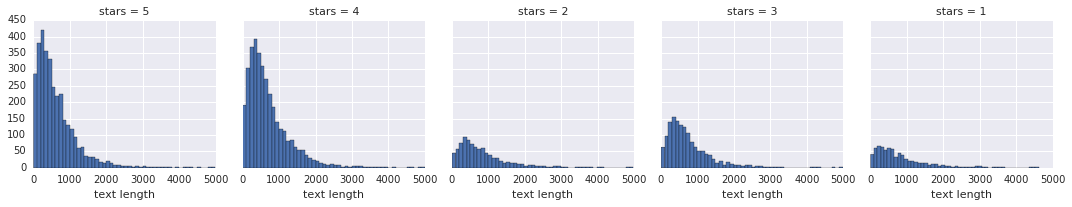

In [8]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)
plt.show()


/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


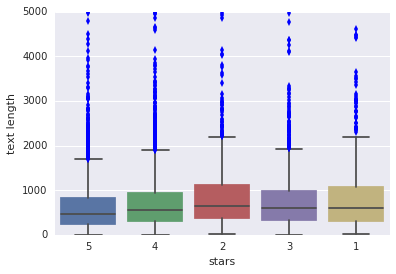

In [9]:
sns.boxplot(x='stars', y='text length', data=yelp)

In [10]:
stars = yelp.groupby('stars').mean()
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


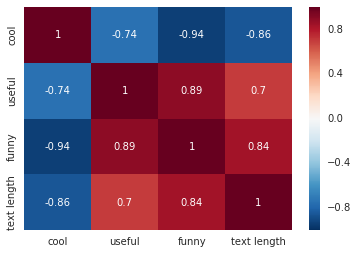

In [11]:
#To visualise these correlations, we can use Seaborn’s heatmap:
sns.heatmap(data=stars.corr(), annot=True)


In [12]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.shape

(4086, 11)

In [13]:
X = yelp_class['text']
y = yelp_class['stars']

In [14]:
#The main issue with our data is that it is all in plain-text format.
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [15]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [16]:
#To check if the function works
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [18]:
#Now, we can look at the size of the vocabulary stored in the vectoriser 
len(bow_transformer.vocabulary_)

26435

In [19]:
review_25 = X[24]
review_25

"I love this place! I have been coming here for ages.\nMy favorites: Elsa's Chicken sandwich, any of their burgers, dragon chicken wings, china's little chicken sandwich, and the hot pepper chicken sandwich. The atmosphere is always fun and the art they display is very abstract but totally cool!"

In [20]:
#Now let’s see our review represented as a vector:
bow_25 = bow_transformer.transform([review_25])
print(bow_25)

  (0, 2099)	1
  (0, 3006)	1
  (0, 8909)	1
  (0, 9151)	1
  (0, 9295)	1
  (0, 9616)	1
  (0, 9727)	1
  (0, 10847)	1
  (0, 11443)	3
  (0, 11492)	1
  (0, 11878)	1
  (0, 12221)	1
  (0, 13323)	1
  (0, 13520)	1
  (0, 14481)	1
  (0, 15165)	1
  (0, 16379)	1
  (0, 17812)	1
  (0, 17951)	1
  (0, 20044)	1
  (0, 20298)	1
  (0, 22077)	3
  (0, 24797)	1
  (0, 26102)	1


In [21]:
print(bow_transformer.get_feature_names()[11443])
print(bow_transformer.get_feature_names()[22077])

chicken
sandwich


In [22]:
X = bow_transformer.transform(X)

#We can check out the shape of our new X.
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

Shape of Sparse Matrix:  (4086, 26435)
Amount of Non-Zero occurrences:  222391


In [24]:
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Density: 0.2058920276658241


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[157  71]
 [ 24 974]]


             precision    recall  f1-score   support

          1       0.87      0.69      0.77       228
          5       0.93      0.98      0.95       998

avg / total       0.92      0.92      0.92      1226



In [30]:
positive_review = yelp_class['text'][59]
positive_review

"This restaurant is incredible, and has the best pasta carbonara and the best tiramisu I've had in my life. All the food is wonderful, though. The calamari is not fried. The bread served with dinner comes right out of the oven, and the tomatoes are the freshest I've tasted outside of my mom's own garden. This is great attention to detail.\n\nI can no longer eat at any other Italian restaurant without feeling slighted. This is the first place I want take out-of-town visitors I'm looking to impress.\n\nThe owner, Jon, is helpful, friendly, and really cares about providing a positive dining experience. He's spot on with his wine recommendations, and he organizes wine tasting events which you can find out about by joining the mailing list or Facebook page."

In [31]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

5

In [32]:
negative_review = yelp_class['text'][281]
negative_review

'Still quite poor both in service and food. maybe I made a mistake and ordered Sichuan Gong Bao ji ding for what seemed like people from canton district. Unfortunately to get the good service U have to speak Mandarin/Cantonese. I do speak a smattering but try not to use it as I never feel confident about the intonation. \n\nThe dish came out with zichini and bell peppers (what!??)  Where is the peanuts the dried fried red peppers and the large pieces of scallion. On pointing this out all I got was " Oh you like peanuts.. ok I will put some on" and she then proceeded to get some peanuts and sprinkle it on the chicken.\n\nWell at that point I was happy that atleast the chicken pieces were present else she would probably end up sprinkling raw chicken pieces on it like the raw peanuts she dumped on top of the food. \n\nWell then  I spoke a few chinese words and the scowl turned into a smile and she then became a bit more friendlier. \n\nUnfortunately I do not condone this type of behavior.

In [33]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

1

In [36]:
another_negative_review = yelp_class['text'][140]
another_negative_review

"Other than the really great happy hour prices, its hit or miss with this place. More often a miss. :(\n\nThe food is less than average, the drinks NOT strong ( at least they are inexpensive) , but the service is truly hit or miss.\n\nI'll pass."

In [37]:
another_negative_review_transformed = bow_transformer.transform([another_negative_review])
nb.predict(another_negative_review_transformed)[0]

5